### Partie graphique

Fonction de base

In [13]:
import csv
import datetime
import os
import ast
from datetime import date

# création variable globale contenant la date du jour d'exécution du programme en format yyyy-mm-jj
jour_brut = date.today()
heure_brut = datetime.time()
jour = jour_brut.isoformat()
heure = heure_brut.strftime("%H-%M-%S")

liste_nutriments = ['energy-kj_u', 'energy-kcal_u', 'energy_u', 'fat_u', 'saturated-fat_u', 'omega-3-fat_u',
                    'carbohydrates_u', 'sugars_u', 'fiber_u', 'proteins_u', 'salt_u', 'sodium_u', 'vitamin-a_u',
                    'vitamin-d_u', 'vitamin-e_u', 'vitamin-k_u', 'vitamin-c_u', 'vitamin-b1_u', 'vitamin-b2_u',
                    'vitamin-pp_u', 'vitamin-b6_u', 'vitamin-b9_u', 'folates_u', 'vitamin-b12_u', 'biotin_u',
                    'pantothenic-acid_u', 'silica_u', 'bicarbonate_u', 'potassium_u', 'calcium_u', 'phosphorus_u',
                    'iron_u', 'magnesium_u', 'zinc_u', 'manganese_u', 'fluoride_u', 'selenium_u', 'chromium_u',
                    'molybdenum_u', 'iodine_u', 'caffeine_u']

# Dictionnaires des recommandations en fonction de l'âge
# L'age indiquée correspond au maximum de la tranche d'age

reco_1an_m = {'energy-kj_u': 3200,
              'energy-kcal_u': 765, 'energy_u': 3200, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 0, 'sugars_u': 0, 'fiber_u': 0, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.004, 'vitamin-k_u': 0, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0003, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.005, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000070, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000006,
              'pantothenic-acid_u': 0, 'silica_u': '', 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0.0005,
              'selenium_u': 0.000012, 'chromium_u': 0,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_1an_f = {'energy-kj_u': 3000,
              'energy-kcal_u': 717, 'energy_u': 3000, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 0, 'sugars_u': 0, 'fiber_u': 0, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.004, 'vitamin-k_u': 0.000070, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0003, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0047, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000070, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000006,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0.0005,
              'selenium_u': 0.000012, 'chromium_u': 0,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_3an_m = {'energy-kj_u': 4550,
              'energy-kcal_u': 1088, 'energy_u': 4550, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 145, 'sugars_u': 15, 'fiber_u': 15, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.006, 'vitamin-k_u': 0.000015, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0004, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0072, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000100, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000012,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0,
              'selenium_u': 0.000012, 'chromium_u': 0.000025,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_3an_f = {'energy-kj_u': 4200,
              'energy-kcal_u': 1004, 'energy_u': 4200, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 134, 'sugars_u': 13, 'fiber_u': 15, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.006, 'vitamin-k_u': 0.000015, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0004, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0066, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000100, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000012,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0,
              'selenium_u': 0.000012, 'chromium_u': 0.000025,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_6an_m = {'energy-kj_u': 6200,
              'energy-kcal_u': 1482, 'energy_u': 6200, 'fat_u': 58, 'saturated-fat_u': 18, 'omega-3-fat_u': 32,
              'carbohydrates_u': 198, 'sugars_u': 20, 'fiber_u': 20, 'proteins_u': 19.7, 'salt_u': 3, 'sodium_u': 1.2,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0075, 'vitamin-k_u': 0.000025, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0006, 'vitamin-b2_u': 0.0008,
              'vitamin-pp_u': 0.0098, 'vitamin-b6_u': 0.0009, 'vitamin-b9_u': 0.000150, 'folates_u': 0.0001,
              'vitamin-b12_u': 0.0000008, 'biotin_u': 0.00002,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 1.1, 'calcium_u': 0.45,
              'phosphorus_u': 0.35,
              'iron_u': 0.0061, 'magnesium_u': 0.120, 'zinc_u': 0.0065, 'manganese_u': 0.001, 'fluoride_u': 0.001,
              'selenium_u': 0.000020, 'chromium_u': 0.000035,
              'molybdenum_u': 0, 'iodine_u': 0.0001, 'caffeine_u': 0}

reco_6an_f = {'energy-kj_u': 5800, 'energy-kcal_u': 1378, 'energy_u': 5800, 'fat_u': 54, 'saturated-fat_u': 17,
              'omega-3-fat_u': 30,
              'carbohydrates_u': 184, 'sugars_u': 18, 'fiber_u': 20, 'proteins_u': 19.7, 'salt_u': 3, 'sodium_u': 1.2,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0075, 'vitamin-k_u': 0.000025, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0006, 'vitamin-b2_u': 0.0008,
              'vitamin-pp_u': 0.0091, 'vitamin-b6_u': 0.0009, 'vitamin-b9_u': 0.000150, 'folates_u': 0.0001,
              'vitamin-b12_u': 0.0000008, 'biotin_u': 0.00002,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 1.1, 'calcium_u': 0.45,
              'phosphorus_u': 0.35,
              'iron_u': 0.0061, 'magnesium_u': 0.120, 'zinc_u': 0.0065, 'manganese_u': 0.001, 'fluoride_u': 0.001,
              'selenium_u': 0.000020, 'chromium_u': 0.000035,
              'molybdenum_u': 0, 'iodine_u': 0.0001, 'caffeine_u': 0}

reco_10ans_m = {'energy-kj_u': 7600, 'energy-kcal_u': 1817, 'energy_u': 7600, 'fat_u': 71, 'saturated-fat_u': 22,
                'omega-3-fat_u': 39,
                'carbohydrates_u': 242, 'sugars_u': 24, 'fiber_u': 20, 'proteins_u': 28.3, 'salt_u': 5, 'sodium_u': 2,
                'vitamin-a_u': 0.0005,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.009, 'vitamin-k_u': 0.00004, 'vitamin-c_u': 0.03,
                'vitamin-b1_u': 0.0007,
                'vitamin-b2_u': 0.001, 'vitamin-pp_u': 0.012, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0002,
                'folates_u': 0.00015,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 2, 'calcium_u': 0.55, 'phosphorus_u': 0.45, 'iron_u': 0.0087, 'magnesium_u': 0.2,
                'zinc_u': 0.007,
                'manganese_u': 0.0015, 'fluoride_u': 0.002, 'selenium_u': 0.00003, 'chromium_u': 0.00004,
                'molybdenum_u': 0,
                'iodine_u': 0.00011, 'caffeine_u': 0}

reco_10ans_f = {'energy-kj_u': 7100, 'energy-kcal_u': 1703, 'energy_u': 7600, 'fat_u': 66, 'saturated-fat_u': 21,
                'omega-3-fat_u': 37,
                'carbohydrates_u': 227, 'sugars_u': 23, 'fiber_u': 20, 'proteins_u': 28.3, 'salt_u': 5, 'sodium_u': 2,
                'vitamin-a_u': 0.0005,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.009, 'vitamin-k_u': 0.00004, 'vitamin-c_u': 0.03,
                'vitamin-b1_u': 0.0007,
                'vitamin-b2_u': 0.001, 'vitamin-pp_u': 0.0112, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0002,
                'folates_u': 0.00015,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 2, 'calcium_u': 0.55, 'phosphorus_u': 0.45, 'iron_u': 0.0087, 'magnesium_u': 0.2,
                'zinc_u': 0.007,
                'manganese_u': 0.0015, 'fluoride_u': 0.002, 'selenium_u': 0.00003, 'chromium_u': 0.00004,
                'molybdenum_u': 0,
                'iodine_u': 0.00011, 'caffeine_u': 0}

reco_14ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 25, 'proteins_u': 42.1, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.035,
                'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0012, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.1, 'calcium_u': 1, 'phosphorus_u': 0.775, 'iron_u': 0.0113, 'magnesium_u': 0.28,
                'zinc_u': 0.009,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00013, 'caffeine_u': 0}

reco_14ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 41.2,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.035,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000012, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.1, 'calcium_u': 0.8, 'phosphorus_u': 0.625, 'iron_u': 0.0148, 'magnesium_u': 0.28,
                'zinc_u': 0.009,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00013, 'caffeine_u': 0}

reco_18ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 30, 'proteins_u': 55.2, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0007, 'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0099, 'vitamin-k_u': 0.000065,
                'vitamin-c_u': 0.04, 'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0013, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0015, 'vitamin-b9_u': 0.00033,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 1, 'phosphorus_u': 0.775, 'iron_u': 0.0113, 'magnesium_u': 0.3,
                'zinc_u': 0.0095,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.00007, 'chromium_u': 0.00005,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_18ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 45,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.04,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.8, 'phosphorus_u': 0.625, 'iron_u': 0.0148, 'magnesium_u': 0.28,
                'zinc_u': 0.007,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_75ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 30, 'proteins_u': 55.5, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0007, 'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0099, 'vitamin-k_u': 0.000065,
                'vitamin-c_u': 0.04, 'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0013, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0015, 'vitamin-b9_u': 0.00033,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.7, 'phosphorus_u': 0.55, 'iron_u': 0.0087, 'magnesium_u': 0.3,
                'zinc_u': 0.0095,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000075, 'chromium_u': 0.00005,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_75ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 45,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.04,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.7, 'phosphorus_u': 0.55, 'iron_u': 0.0148, 'magnesium_u': 0.27,
                'zinc_u': 0.007,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}


# --------------------------------------------------#
# gestion sauvegarde

def save_exist():
    """Fonction créant un fichier de sauvegarde si non existant"""
    if not os.path.isfile("users_save.csv"):
        with open("users_save.csv", 'a', newline='') as file:
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "nutriscore", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)
            writer.writeheader()


def affiche_profil():
    """Fonction permettant de demander et récupérer les informations du profil d'un utilisateur"""
    if os.path.isfile("users_save.csv"):
        compteur = 1
        with open("users_save.csv", "r") as file:
            liste = list(csv.DictReader(file, delimiter=','))
            for i in liste:
                print(str(compteur) + '. ' + i["prenom"] + ' ' + i["nom"])
                compteur += 1
        selection = int(input("Entrez votre sélection : "))
        return liste[selection - 1]

    else:
        print("Aucun profil enregistré")


def file_to_list(file_name):
    """Fonction prenant en argument le nom d'un fichier csv,
    et retourne une liste de dictionnaires des données de ce fichier"""
    with open(str(file_name), 'r', encoding='UTF-8') as file:
        return list(csv.DictReader(file, delimiter=';'))


class User:
    def __init__(self, prenom, nom, naissance, sexe, nutrition, nutriscore, poids, taille, imc):
        self.prenom = prenom
        self.nom = nom
        self.naissance = naissance
        self.sexe = sexe  # 'H' ou 'F'
        self.nutrition = nutrition
        self.nutriscore = nutriscore
        self.taille = taille  # taille en cm
        self.poids = poids  # poids en kg
        self.age = (jour_brut - date(int(self.naissance[2]), int(self.naissance[1]),
                                     int(self.naissance[0]))).days // 365  # age calculé en fonction de la date saisie
        if type(poids) == dict and type(taille) == dict and imc == '':
            dates = list(poids)
            dates = sorted(dates)
            self.imc = {jour: calcul_IMC(poids[dates[len(dates)-1]], taille[dates[len(dates)-1]])}
        elif type(imc) == dict:
            self.imc = imc
        else:
            self.imc = {jour: calcul_IMC(poids, taille)}

    def add_user(self):
        """Fonction ajoutant un nouvel utilisateur s'il n'existait pas, et prépare les différents éléments"""
        # création de dictionnaires pour chaque caractéristiques à sauvegarder, avec en clé une date et en valeurs les
        # valeurs correspondantes
        poids_u = {}
        taille_u = {}
        imc_u = {}
        nutrition_u = {}
        val = {}
        for i in liste_nutriments:
            val[i] = 0
        nutrition_u[jour] = val
        nutriscore_u = {}
        poids_u[jour] = self.poids
        taille_u[jour] = self.taille
        self.poids = poids_u
        self.taille = taille_u
        self.nutriscore = nutriscore_u
        self.nutrition = nutrition_u
        new_user = {"prenom": self.prenom, "nom": self.nom, "naissance": self.naissance, "sexe": self.sexe,
                    "nutrition": self.nutrition, "nutriscore": self.nutriscore, "poids": self.poids,
                    "taille": self.taille, "imc": self.imc, "date_modif": jour}
        save_exist()
        with open("users_save.csv", 'a', newline='') as file:
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "nutriscore", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)
            writer.writerow(new_user)

    def save(self):
        """Fonction prenant en argument le prenom et le nom du profil dont les nouvelles informations doivent être
        sauvegardées"""
        sans_modif = []
        with open("users_save.csv", "r") as file:
            for i in list(csv.DictReader(file, delimiter=',')):
                if i["prenom"] != self.prenom and i["nom"] != self.nom:
                    sans_modif.append(i)
        with open("users_save.csv", "w") as file:
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "nutriscore", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)
            writer.writeheader()
            for i in sans_modif:
                writer.writerow(i)
            writer.writerow({"prenom": self.prenom, "nom": self.nom, "naissance": self.naissance, "sexe": self.sexe,
                             "nutrition": self.nutrition, "nutriscore": self.nutriscore, "poids": self.poids,
                             "taille": self.taille, "imc": self.imc, "date_modif": jour})

# sélection du profil
def selection_profil():
    use = affiche_profil()
    # récupération données depuis une sauvegarde existante
    user_select = User(use["prenom"], use["nom"], ast.literal_eval(use["naissance"]), use["sexe"],
                ast.literal_eval(use["nutrition"]), ast.literal_eval(use["nutriscore"]), ast.literal_eval(use["poids"]),
                ast.literal_eval(use["taille"]), ast.literal_eval(use["imc"]))
    return user_select


# --------------------------------------------------#
# gestion nutrition

def recherche(liste_base):
    """Fonction prenant en argument la base de données csv en liste, demande le nom d'un produit, et vérifie sa présence
     dans la liste et retourne le produit choisi par l'utilisateur sous forme de dictionnaire"""

    produit = input('Entrez le nom du produit : ')
    produit = produit.lower()
    produits_trouves = []
    for i in liste_base:
        product_name = i['product_name']
        marque = i["brands"]
        if produit in product_name.lower() or produit in marque.lower():
            produits_trouves.append(i)

    # Mise en place d'une boucle pour proposer de nouveau la recherche si aucune occurence trouvée

    while not produits_trouves or produit == '':
        print("Produit non trouvé, réessayer")
        produit = input('Entrez le nom du produit : ')
        produit = produit.lower()
        produits_trouves = []
        for i in liste_base:
            product_name = i['product_name']
            marque = i["brands"]
            if produit in product_name.lower() or produit in marque.lower():
                produits_trouves.append(i)

    if len(produits_trouves) == 1:
        return produits_trouves[0]
        # Si une seule occurence est trouvée, le résultat est immédiatement retourné

    else:
        # Si plusieurs occurences trouvées, demander un choix à l'utilisateur
        # Affichage d'une liste des produits
        print("Voici la liste des produits trouvés :")
        compteur = 1
        for i in produits_trouves:
            if i['brands'] != '' and i['quantity'] != '':
                print(str(compteur) + '. ' + i['product_name'] + ' de ' + i['brands'] + ' | ' + i['quantity'])
                # Exemple : 1. Nom du produit de telle marque | quantité
            elif i['brands'] != '' and i['quantity'] == '':
                print(str(compteur) + '. ' + i['product_name'] + ' de ' + i['brands'])
                # Exemple : 1. Nom du produit de telle marque
            elif i['brands'] == '' and i['quantity'] != '':
                print(str(compteur) + '. ' + i['product_name'] + ' | ' + i['quantity'])
                # Exemple : 1. Nom du produit | quantité
            else:
                print(str(compteur) + '. ' + i['product_name'])
                # Exemple : 1. Nom du produit
            compteur += 1
        choix = int(input('Entrez le numéro correspondant à votre produit : '))
        while choix > compteur or choix < 1:
            print("Numéro incorrect, réessayez.")
            choix = int(input('Entrez le numéro correspondant à votre produit : '))
        return produits_trouves[choix - 1]


def extraction_info(dict_produit):
    """Fonction extrayant les informations générales d'un dictionnaire d'un produit et les retournant
    sous forme d'une liste"""
    info_a_extraire = ['product_name', 'main_category', 'nutriscore_grade', 'image_url', 'url']
    info_extraites = []
    for i in info_a_extraire:
        info_extraites.append(dict_produit[i])
    return info_extraites


def extraction_nutriment(dict_produit):
    """Fonction extrayant les informations nutritionnelles d'un dictionnaire d'un produit et les retournant
    sous forme d'une liste"""
    if type(dict_produit) == dict:
        l = []
        for i in dict_produit:
            l.append(dict_produit[i])
        l = l[16:]
        for i in range(len(l)):
            if l[i] == '':
                l[i] = 0
            else:
                l[i] = float(l[i])
        return l
    else:
        return "Erreur produit"

    """ordre des informations extraites : ['nutriscore_grade', 'nova_group', 'pnns_groups_1', 'main_category', 'image_url', 'energy-kj_100g',
    'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'omega-3-fat_100g', 
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 
    'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 
    'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 
    'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 
    'iron_100g', 'magnesium_100g', 'zinc_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 
    'molybdenum_100g', 'iodine_100g', 'caffeine_100g']"""


def calcul_quantite(nutriments):
    """Fonction prenant la liste d'apports nutritionnels pour 100g du produit, demandant la quantité de produit consommé,
    et retournant la liste d'apports nutritionnels pour la quantité consommée."""
    quantite = int(input('Entrez la quantité de produit consommé : '))
    nutriments_calcules = []
    for i in nutriments:
        nutriments_calcules.append(round((i * quantite) / 100, 3))
    return nutriments_calcules


def ajout_nutriments(nutriments, sauvegarde):
    """Fonction prenant en argument la liste des valeurs nutritionnelles à ajouter aux valeurs sauvegardées
    au jour actuel et la sauvegarde à modifier, et effectue l'ajout de ces valeurs à celles du jour actuel"""
    compteur = 0
    for i in liste_nutriments:
        sauvegarde[jour][i] += nutriments[compteur]
        compteur += 1
    return


def comparaison(sexe, age, nutriments):
    """Fonction prenant en argument le sexe, l'age et les infos nutritionnelles du profil utilisateur, compare avec les
        recommandation journalières et retourne un dictionnaire du résultat pour chaque nutriment"""
    res = {}
    elements_a_pas_depasser = ['fat_u', 'saturated-fat_u', 'sugars_u', 'salt_u', 'omega-3-fat_u', 'energy-kj_u',
                               'energy-kcal_u', 'energy_u']
    if sexe == 'H':
        if 0 <= age < 2:
            rnj = reco_1an_m
        elif 2 <= age < 4:
            rnj = reco_3an_m
        elif 4 <= age < 7:
            rnj = reco_6an_m
        elif 7 <= age < 11:
            rnj = reco_10ans_m
        elif 11 <= age < 15:
            rnj = reco_14ans_m
        elif 15 <= age < 18:
            rnj = reco_18ans_m
        else:
            rnj = reco_75ans_m
    else:
        if 0 <= age < 2:
            rnj = reco_1an_f
        elif 2 <= age < 4:
            rnj = reco_3an_f
        elif 4 <= age < 7:
            rnj = reco_6an_f
        elif 7 <= age < 11:
            rnj = reco_10ans_f
        elif 11 <= age < 15:
            rnj = reco_14ans_f
        elif 15 <= age < 18:
            rnj = reco_18ans_f
        else:
            rnj = reco_75ans_f

    for i in liste_nutriments:
        if i in elements_a_pas_depasser:
            if nutriments[i] > rnj[i]:
                res[i] = 'Dépassement'
            elif (rnj[i] - (10 * rnj[i]) / 100) <= nutriments[i] <= rnj[i]:
                res[i] = 'Apport régulier'
            else:
                res[i] = 'Apport manquant'
        else:
            if nutriments[i] < (rnj[i] - (10 * rnj[i]) / 100):
                res[i] = 'Apport manquant'
            else:
                res[i] = 'Apport régulier'
    return res


# --------------------------------------------------#
# gestion poids

def calcul_IMC(poids, taille):
    """Fonction prenant en argument le poids en float ou entier, la taille en entier, la sauvegarde de l'imc du profil
    utilisateur, calcule l'imc du jour, le stocke dans la sauvegarde et le retourne"""
    return round(poids / (taille / 100) ** 2, 2)

def gestion_poids(save_poids, save_taille, save_imc):
    """Fonction prenant en argument les sauvegardes du profil utilisateur, demandant le poids et la taille du jour,
     calcule l'IMC et sauvegarde ces nouvelles informations"""

    poids = input("Entrez votre poids en kg : ")
    if ',' in poids:
        poids = poids.replace(',', '.')
    save_poids[jour] = float(poids)
    save_taille[jour] = int(input("Entrez votre taille en cm : "))
    save_imc[jour] = calcul_IMC(save_poids[jour], save_taille[jour])


def evolution(save_imc, save_poids, save_taille):
    """Fonction prenant en argument les sauvegardes de l'imc, du poids et de la taille de l'utilisateur, et retourne un
    dictionnaire contenant l'évolution de chacune de ces données"""
    res = {}
    dates_imc = list(save_imc)
    dates_poids = list(save_poids)
    dates_taille = list(save_taille)
    if len(dates_imc) >= 2 and len(dates_taille) >= 2 and len(dates_poids) >= 2:
        poids_j1 = save_poids[dates_poids[len(dates_poids) - 2]]
        poids_j0 = save_poids[dates_poids[len(dates_poids) - 1]]
        taille_j1 = save_taille[dates_taille[len(dates_taille) - 2]]
        taille_j0 = save_taille[dates_taille[len(dates_taille) - 1]]
        imc_j1 = save_imc[dates_imc[len(dates_imc) - 2]]
        imc_j0 = save_imc[dates_imc[len(dates_imc) - 1]]
        res["evo_poids": poids_j0 - poids_j1]
        res["evo_taille": taille_j0 - taille_j1]
        res["evo_imc": imc_j0 - imc_j1]
    else:
        res = "L'évolution ne peut pas encore être calculée"
    return res


# --------------------------------------------------#
# Commandes de test

# Si le code a déjà été exécuté une fois, mettre en commentaire les 4 lignes ci-dessous
'''user_test_1 = User("Adrien", "Somarandy", [10, 11, 2001], 'H', '', '', 96.2, 173, '')
user_test_1.add_user()
user_test_2 = User("Spencer", "Thomas", [7, 11, 2002], 'H', '', '', 65.8, 173, '')
user_test_2.add_user()
'''

ALIM = file_to_list('./base_aliments_reu_reduite.csv')
test_1 = selection_profil()
print("____ Test nutrition ____")
ajout_nutriments(calcul_quantite(extraction_nutriment(recherche(ALIM))), test_1.nutrition)
print(comparaison(test_1.sexe, test_1.age, test_1.nutrition[jour]))
print("____ Test poids ____")
test_poids = selection_profil()
gestion_poids(test_poids.poids, test_poids.taille, test_poids.imc)
test_1.save()
test_poids.save()

# --------------------------------------------------#


1. Spencer Thomas
2. Spencer Thomas
3. Adrien Somarandy
4. Adrien Somarandy
5. Spencer Thomas


Entrez votre sélection :  1


____ Test nutrition ____


Entrez le nom du produit :  lait


Voici la liste des produits trouvés :
1. Perle de lait eclat de chocolat
2. RICORE au Lait de Nestlé | 400 g
3. Pépito pockitos Chocolat au Lait de Lu | 295 g
4. Parmigiano Reggiano AOP râpé au lait cru 30% de mg de U Saveurs, U | 60 g
5. Lait d'amande vanille de Bjorg | 1 L e
6. Lait d'amande calcium de Bjorg | 1 L
7. Lait relais 6-12mois
8. Le Lait de Candia
9. Lait amande intense bio de Bio Village,Marque Repère | 1 l
10. Lait d’amande sans sucres de Bjorg | 1 L
11. Lait d'amande Intense de Bjorg | 1 L
12. Biscuit lait chocolat de Gerblé,Gerblé Vitalité | 230 g
13. Nesquik - Barre de céréales au chocolat en poudre et au lait de Nestlé,Nesquik,General Mills | 25 g
14. NESTLE FITNESS Chocolat au lait céréales de Nestlé, Fitness chocolate | 375 g
15. Monsavon Déodorant Femme Spray Anti Transpirant Lait & Fleur d'Oranger Compressé de Monsavon | 100 ml
16. Nature - texture ferme de Yoplait | 500 g
17. Yaourt de Yoplait
18. Lait Demi Ecrémé Pâturages de Pâturages | 1000 ml
19. Pains au La

Entrez le numéro correspondant à votre produit :  90
Entrez la quantité de produit consommé :  500


{'energy-kj_u': 'Apport manquant', 'energy-kcal_u': 'Apport manquant', 'energy_u': 'Apport manquant', 'fat_u': 'Apport manquant', 'saturated-fat_u': 'Apport manquant', 'omega-3-fat_u': 'Apport manquant', 'carbohydrates_u': 'Apport manquant', 'sugars_u': 'Apport manquant', 'fiber_u': 'Apport manquant', 'proteins_u': 'Apport manquant', 'salt_u': 'Apport manquant', 'sodium_u': 'Apport manquant', 'vitamin-a_u': 'Apport manquant', 'vitamin-d_u': 'Apport manquant', 'vitamin-e_u': 'Apport manquant', 'vitamin-k_u': 'Apport manquant', 'vitamin-c_u': 'Apport manquant', 'vitamin-b1_u': 'Apport manquant', 'vitamin-b2_u': 'Apport manquant', 'vitamin-pp_u': 'Apport manquant', 'vitamin-b6_u': 'Apport manquant', 'vitamin-b9_u': 'Apport manquant', 'folates_u': 'Apport manquant', 'vitamin-b12_u': 'Apport manquant', 'biotin_u': 'Apport manquant', 'pantothenic-acid_u': 'Apport régulier', 'silica_u': 'Apport régulier', 'bicarbonate_u': 'Apport régulier', 'potassium_u': 'Apport manquant', 'calcium_u': 'Appo

Entrez votre sélection :  1
Entrez votre poids en kg :  90
Entrez votre taille en cm :  180


### Fonctions

In [23]:
def pourcentage(total,nut):  
    # total pour la valeur nutritive totale et nut pour la valeur nutritive du nutriment a calculer
    return (nut*100)/total
def search_val(liste,donnee): # donne = test_1.nutrition dans mon test
    # fonction qui prend en parametre une liste des nutriments , et retourne une liste avec une ordre precise ses valeurs nutritionel 
    liste_val_nut=[]
    for elem in liste:
        liste_val_nut.append(donnee[jour][elem])
    return liste_val_nut
def cree_liste(donnee): 
    ls_jour=[]
    ev=[]
    for elem in donnee:
        ls_jour.append(elem)
        ev.append(donnee[elem])
        return ls_jour , ev
def liste_val_comparaison(sexe, age, nutriments):
    """Fonction prenant en argument le sexe, l'age et les infos nutritionnelles du profil utilisateur,
    et retourne une liste avec les recommondation lié a l'age le sexe"""
    res = []
    
    if sexe == 'H':
        if 0 <= age < 2:
            for elem in reco_1an_m:
                res.append(reco_1an_m[elem])
        elif 2 <= age < 4:
            for elem in reco_3ans_m:
                res.append(reco_3ans_m[elem])
        elif 4 <= age < 7:
            for elem in reco_6ans_m:
                res.append(reco_6ans_m[elem])
        elif 7 <= age < 11:
            for elem in reco_10ans_m:
                res.append(reco_10ans_m[elem])
        elif 11 <= age < 15:
            for elem in reco_14ans_m:
                res.append(reco_14ans_m[elem])
        elif 15 <= age < 18:
            for elem in reco_18ans_m:
                res.append(reco_18ans_m[elem])
        else:
            for elem in reco_75ans_m:
                res.append(reco_75ans_m[elem])
    else:
        if 0 <= age < 2:
            for elem in reco_1an_f:
                res.append(reco_1an_f[elem])
        elif 2 <= age < 4:
            for elem in reco_3ans_f:
                res.append(reco_3ans_f[elem])
        elif 4 <= age < 7:
            for elem in reco_6ans_f:
                res.append(reco_6ans_f[elem])
        elif 7 <= age < 11:
            for elem in reco_10ans_f:
                res.append(reco_10ans_f[elem])
        elif 11 <= age < 15:
            for elem in reco_14ans_f:
                res.append(reco_14ans_f[elem])
        elif 15 <= age < 18:
            for elem in reco_18ans_f:
                res.append(reco_18ans_f[elem])
        else:
            for elem in reco_75ans_f:
                res.append(reco_75ans_f[elem])
    return res 

### Graphe Nutrition

In [26]:
def cam_proteines(donnee):
    # Camembert sur Protéines, sucres et graisses

    nutriments1=['proteins_u','sugars_u','fat_u','saturated-fat_u','omega-3-fat_u']
    valeurs_nut1=search_val(nutriments1,donnee)
    total1=0
    pourcentag1=[]
    for elem in valeurs_nut1:
        total1+=elem
    for elem in valeurs_nut1:
        pourcentag1.append(pourcentage(total1,elem))
    

    # Pourcentag et nutriments les deux liste pour faire le camembert
    fig, ax =plt.subplots(figsize=(10,7))
    ax.set_title('Protéines, sucre, fat')
    ax.pie(pourcentag1,startangle=90,shadow='true',autopct='%1.1f%%')
    ax.legend(nutriments1)
    plt.show()

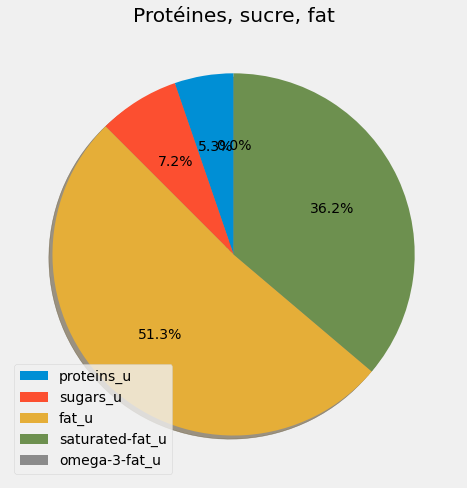

In [28]:
cam_proteines(test_1.nutrition)

In [29]:
def cam_mineraux(donnee):
    # Minéraux

    nutriments3=['carbohydrates_u', 'fiber_u', 'salt_u', 'sodium_u', 'folates_u', 'biotin_u', 'pantothenic-acid_u', 'silica_u', 'bicarbonate_u', 'potassium_u','calcium_u','phosphorus_u','iron_u','magnesium_u','zinc_u','manganese_u','fluoride_u','selenium_u','chromium_u','molybdenum_u','iodine_u','caffeine_u']
    valeurs_nut3=search_val(nutriments3,donnee)
    total3=0
    pourcentag3=[]
    for elem in valeurs_nut3:
        total3+=elem
    for elem in valeurs_nut3:
        pourcentag3.append(pourcentage(total3,elem))
    

    # Pourcentag et nutriments les deux liste pour faire le camembert

    fig, ax =plt.subplots()

    ax.pie(pourcentag3,startangle=90,shadow='true',autopct='%1.1f%%')
    ax.set_title('Camembert sur les Mineraux')
    plt.show()

### Graphe IMC

In [31]:
def gra_imc(donnee): # donnee = test_1.imc
    ls_jour,ev_imc=cree_liste(donnee)
    fig, ax =plt.subplots(figsize=(10,6))
    ax.plot(ls_jour,ev_imc)
    ax.set(title='IMC')
    ax.axhline(y=18.5, linestyle='--',linewidth=1.8,color='orange')
    ax.axhspan(15,18.5, facecolor='0.7')
    ax.text(0,16.5, 'Insuffisance pondérale')
    ax.axhline(y=24.9, linestyle='--',linewidth=1.8,color='orange')
    ax.axhspan(18.5,24.9, facecolor='0.9')
    ax.text(0,22,'Poids normal')
    ax.axhline(y=30, linestyle='--',linewidth=1.8,color='orange')
    ax.axhspan(24.9,30, facecolor='0.8')
    ax.text(0,27.5,'Surpoids')
    ax.axhspan(30, 35, facecolor='0.7')
    ax.text(0,32.5,'Obesite')

    ax.set(xlim=[0,7],ylim=[15,35])

    plt.show()

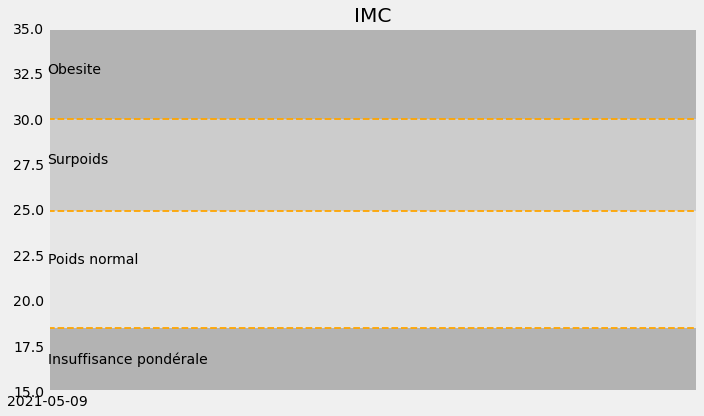

In [32]:
gra_imc(test_1.imc)

### Graphe Poids

In [35]:
def gra_poids(donnee): #donnee = test_1.poids
    ls_jour2,ev_poids=cree_liste(donnee)
    fig, ax =plt.subplots()
    ax.plot(ls_jour2,ev_poids)
    ax.set(title='Evolution Poids',ylabel='Poids (kg)')

    plt.show()


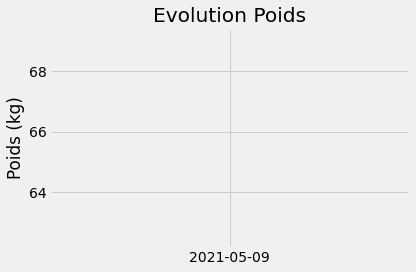

In [36]:
gra_poids(test_1.poids)

### Graphe Taille

In [37]:
def gra_taille(donnee): # donnee = test_1.taille
    ls_jour3,ev_taille=cree_liste(donnee)
    fig, ax =plt.subplots()
    ax.plot(ls_jour3,ev_taille)
    ax.set(title='Evolution Taille',ylabel='taimlle (cm)')

    plt.show()

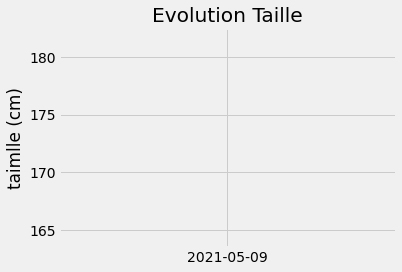

In [38]:
gra_taille(test_1.taille)

### Graphe comparaison nutriments

In [51]:
val_nut = search_val (donnee) # val_nut : liste des valeurs nutritionnelles de chacun des nutriment
name_nut=[] # name_nut liste des noms des nutrimens

NameError: name 'donnee' is not defined

In [58]:
def gra_comparaison(donnee):
    # dict_comp un dictionnaire contenant l'interpretation de chaque valeurs nutritionnelles d'un nutriment
    dict_comp=comparaison(test_1.sexe, test_1.age, donnee[jour]) # donnee = test_1.nutrition
    val_nut = search_val (donnee[jour],donnee) # val_nut : liste des valeurs nutritionnelles de chacun des nutriment
    name_nut=[] # name_nut liste des noms des nutrimens
    # nut_comp dict clé nutriments valeur valeur nutritionelle
    nut_comp=donnee[jour]
    
    val_nut=search_val(test_1.nutrition[jour]) # val_nut : liste des valeurs nutritionnelles de chacun des nutriment
    name_nut=[] # name_nut liste des noms des nutrimens

    for elem in donnee[jour]:
        name_nut.append(elem)
    val_comp=liste_val_comparaison(test_1.sexe,test_1.age,donnee) #sexe = test_1.sexe etc 


    labels=name_nut
    labels_1=labels[1:3]
    labels_2=labels[3:11]
    val_comp_1=val_comp[1:3]
    val_comp_2=val_comp[3:11]
    val_comp_3=val_comp[11:19]
    val_comp_4=val_comp[19:27]
    val_comp_5=val_comp[27:34]
    val_comp_6=val_comp[34:]

    val_nut_1=val_nut[1:3]
    val_nut_2=val_nut[3:11]
    val_nut_3=val_nut[11:19]
    val_nut_4=val_nut[19:27]
    val_nut_5=val_nut[27:34]
    val_nut_6=val_nut[34:]

    x1 = np.arange(len(labels_1))
    x2 = np.arange(len(labels_2))
    x3 = np.arange(len(labels[11:19]))
    x4 = np.arange(len(labels[19:27]))
    x5 = np.arange(len(labels[27:34]))
    x6 = np.arange(len(labels[34:]))
    width = 0.35  

    fig, axs = plt.subplots(2,3,figsize=(16,9))
    axs[0,0].bar(x1 - width/2, val_comp_1, width, label='recommande')
    axs[0,0].bar(x1 + width/2, val_nut_1, width, label="par l'utilisateur")
    axs[0,1].bar(x2 - width/2, val_comp_2, width, label='recommande') 
    axs[0,1].bar(x2 + width/2, val_nut_2, width, label="par l'utilisateur")
    axs[0,2].bar(x3 - width/2, val_comp_3, width, label='recommande')
    axs[0,2].bar(x3 + width/2, val_nut_3, width, label="par l'utilisateur")
    axs[1,0].bar(x4 - width/2, val_comp_4, width, label='recommande') 
    axs[1,0].bar(x4 + width/2, val_nut_4, width, label="par l'utilisateur")
    axs[1,1].bar(x5 - width/2, val_comp_5, width, label='recommande')
    axs[1,1].bar(x5 + width/2, val_nut_5, width, label="par l'utilisateur")
    axs[1,2].bar(x6 - width/2, val_comp_6, width, label='recommande') 
    axs[1,2].bar(x6 + width/2, val_nut_6, width, label="par l'utilisateur")
    axs[0,0].set_xticks(x1)

    axs[0,0].set_xticklabels(labels_1)

    axs[0,1].set_title('Comparaison valeur nutritive recommandée et consommée')
    axs[0,0].legend()
    axs[0,1].legend()
    axs[0,2].legend()
    axs[1,0].legend()
    axs[1,1].legend()
    axs[1,2].legend()
    axs[0,1].axis('off')

    plt.rcParams.update({'figure.autolayout': True})
    plt.show()

In [59]:
gra_comparaison(test_1.nutrition)

KeyError: '2021-05-09'